#7.5

In [0]:
import numpy as np
from scipy.stats import zipf, poisson
from matplotlib import pyplot as plt
from scipy.integrate import quad

## 7.20

Finish the proof of Proposition 7.5.2 by proving that the Metropolis-Hastings construction is reversible. Take care to also treat the edge cases where one of the terms $\pi_s,\pi_{s'},q_{s,s'},q_{s',s}$ is zero.

The reversibility condition states that if $\pi_{s'}p_{s,s'} = \pi_{s}p_{s',s}$ for all $s,s' \in S$, the Markov chain is reversible.

Assume for any $s,s'$ that $\pi_sq_{s's} \geq \pi_{s'}q_{ss'}$ (without loss of generality). Then by definition, $p_{s's} = \frac{\pi_{s'}q_{ss'}}{\pi_s}$, and $p_{ss'} = q_{ss'} 

so  $\pi_{s}p_{s's} = \pi_{s} \frac{\pi_{s'}q_{ss'}}{\pi_s} = \pi_{s'}q_{ss'} = \pi_{s'}p_{ss'} $ without loss of generality.

Note that if either $\pi_s$ or $\pi_{s'}$ are 0, then $\pi$ no longer represents a stationary distribution and Metropolis-Hastings does not apply in the first place. Note as well that if $q_{s's}$ (or $q_{ss'}$ without loss of generality) is 0 and $q_{ss'} > 0$ , then $p_{s's} =q_{s's}=  0$ and $p_{ss'} = \frac{\pi_sq_{s's}}{\pi_{s'}} = 0$, so $\pi_{s'}p_{s,s'} = \pi_{s}p_{s',s} = 0$

##7.21

Adapt the proposal chain X of M+1 nodes with each node having a probablity $p \in [0,1]$ of moving to the right and $(1-p)$ of moving to the left at each time step.

i.) What is the acceptance probability for each pair $s,s'$?

$a_{s',s} = \min(\frac{\pi_{s'}q_{ss'}}{\pi_sq_{s's}},1) = 
\begin{cases}
\min((\frac{s}{s+1})^\alpha (\frac{p}{1-p}),1) \text{ if } s' = s+1 \\
\min((\frac{s}{s-1})^\alpha (\frac{1-p}{0p}),1) \text{ if } s' = s-1 \\
0 \text{ otherwise }
\end{cases}
$ 

ii.) Implement the Metropolis-Hastings sampler for the Zipf distribution.

In [0]:
def ZipfSampler(M, a, p, N, x_0, K):
  def Bernoulli(p):
    return np.random.rand(1)[0] <= p

  t = 0
  y = np.empty(K + N)
  y[0] = x_0
  while t < K + N - 1:
    right = Bernoulli(p)
    proposal = min(y[t] + 1, M) if right else max(1, y[t] - 1)
    accept_prob = min( (y[t]/proposal)**a * (1-p)/p, 1) if right else min( (y[t]/proposal)**a * p/(1-p), 1 )
    # print(accept_prob,right)
    if Bernoulli(accept_prob):
      y[t+1] = proposal
    else:
      y[t+1] = y[t]

    t += 1
  return y[-N:]


iii.) Sample from the above function for various values of k and plot against the true Zipf distribution

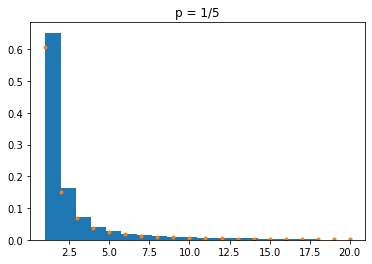

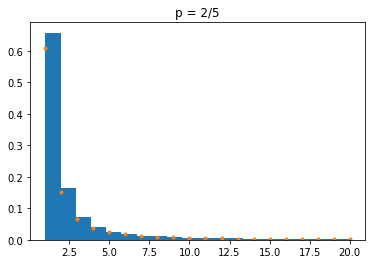

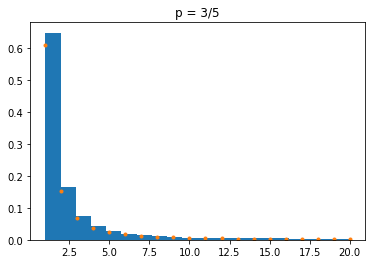

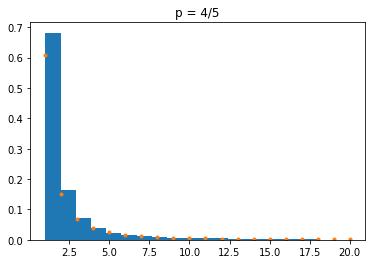

In [14]:
M = 20
a = 2
ks = np.arange(1,5)
n = 10**5
K = 0

domain = np.arange(1,M+1)

for k in ks:
  p = k/5
  draws = ZipfSampler(M,a,p,n,1,0)
  plt.hist(draws, density=True,bins=M,label="Samples")
  plt.plot(domain,zipf(a).pmf(domain),'.',label="True distribution")
  plt.title("p = {}/5".format(k))
  plt.show()

##7.22

Implement the Metropolis-Hastings sampling algorithm for continuous target distributions on $\mathbb{R}$, using the normal distribution $\mathcal{N}(x_t,\sigma^2)$.

In [0]:
def metropolis_hastings_normal(f,sig,x_0,num_samples):
  """ Perfoms Metropolis-Hastings algorithm 
  to generate num_samples samples from the p.d.f. proportional to f(x) """
  y = np.empty(num_samples)
  y[0] = x_0
  t = 0
  while t < num_samples - 1:
    proposal = np.random.randn(1) * sig + y[t]
    accept_prob = min( f(proposal) / f(y[t]), 1 )
    if np.random.rand(1)[0] <= accept_prob:
      y[t+1] = proposal
    else:
      y[t+1] = y[t]
    
    t += 1
  
  return y

In [28]:
# Calculate Z, normalization factor
f = lambda x: 4 * np.exp(-(x + 3)**2 / 4) + 6 * np.exp(-(x-5)**2 / 32)

Z = quad(f,-np.inf,np.inf)[0]
print(Z)

74.33870939838813


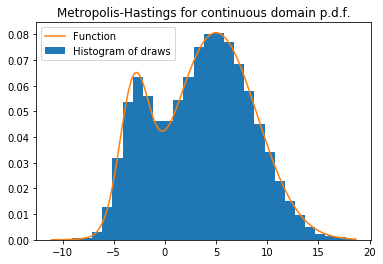

In [29]:
sig = 1
x_0 = 5
N = 10**5

draws = metropolis_hastings_normal(f,sig, x_0, N)

# Get the max and min to define domain for plot
domain = np.linspace(min(draws), max(draws), 100)

plt.hist(draws, label="Histogram of draws", bins=int(max(draws) - min(draws)) + 1, density=True)

plt.plot(domain, f(domain)/Z, label="Function")
plt.legend()
plt.title("Metropolis-Hastings for continuous domain p.d.f.")
plt.show()

##7.23

Do the same, but with Uniform proposal.

In [0]:
def metropolis_hastings_uniform(f, L, x_0, N):
  """ Perfoms Metropolis-Hastings algorithm with uniform proposal 
  to generate num_samples samples from the p.d.f. proportional to f(x) """
  y = np.empty(N)
  y[0] = x_0
  t = 0
  while t < N - 1:
    proposal = (np.random.random() - .5) * 2 *L + y[t]
    accept_prob = min( f(proposal) / f(y[t]), 1 )
    if np.random.rand(1)[0] <= accept_prob:
      y[t+1] = proposal
    else:
      y[t+1] = y[t]
    
    t += 1
  
  return y

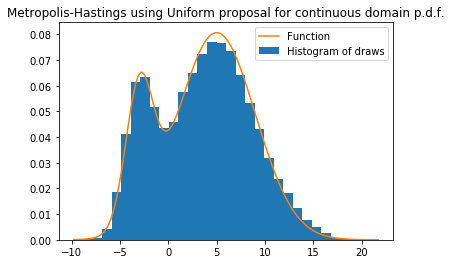

In [45]:
L = 1
x_0 = 5
N = 10**5

draws = metropolis_hastings_uniform(f,L, x_0, N)

# Get the max and min to define domain for plot
domain = np.linspace(min(draws), max(draws), 100)

plt.hist(draws, label="Histogram of draws", bins=int(max(draws) - min(draws)) + 1, density=True)

plt.plot(domain, f(domain)/Z, label="Function")
plt.legend()
plt.title("Metropolis-Hastings using Uniform proposal for continuous domain p.d.f.")
plt.show()

##7.24

Consider the proposal Markov chain on $\mathbb{N}$ with probability p of moving right. Implement Metropolis-Hastings method to sample from $\text{Poisson}(\lambda)$ using this proposal.

In [0]:
def metropolis_hastings_natural(lamb, p, x_0, N):
  pdf = poisson(lamb).pmf
  y = np.empty(N)
  y[0] = x_0
  t = 0
  while t < N - 1:
    right = np.random.random() <= p
    proposal = y[t] + 1 if right else max(y[t] - 1, 0)
    accept_prob = min(pdf(proposal) * (1-p) / (pdf(y[t] * p)), 1) if right else min(pdf(proposal)/pdf(y[t]) * p / (1-p), 1)
    if np.random.random() <= accept_prob:
      y[t+1] = proposal
    else:
      y[t+1] = y[t]
    
    t += 1
  
  return y

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


[3. 3. 3. ... 3. 3. 4.]


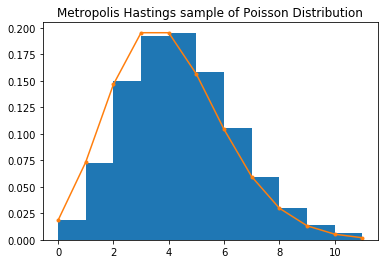

In [54]:
p = 0.3
x_0 = 3
lamb = 4
N = 10**5

draws = metropolis_hastings_natural(lamb, p, x_0, N)
domain = np.arange(min(draws), max(draws) + 1)

plt.hist(draws,density=True, bins = int(max(draws) - min(draws)))
plt.plot(domain, poisson(lamb).pmf(domain),'.-')
plt.title("Metropolis Hastings sample of Poisson Distribution")
plt.show()